# LSTM Stock Predictor Using Closing Prices

In this notebook, we will build and train a custom LSTM RNN that uses a 10 day window of chosen stock closing prices to predict the 11th day closing price. 

We will need to:

1. Prepare the data for training and testing
2. Build and train a custom LSTM RNN
3. Evaluate the performance of the model

## Data Preparation

In this section, we will need to prepare the training and testing data for the model. The model will use a rolling 10 day window to predict the 11th day closing price.

We will need to:
1. Use the `window_data` function to generate the X and y values for the model.
2. Split the data into 70% training and 30% testing
3. Apply the MinMaxScaler to the X and y values
4. Reshape the X_train and X_test data for the model. Note: The required input format for the LSTM is:

```python
reshape((X_train.shape[0], X_train.shape[1], 1))
```

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Set the random seed for reproducibility
# Note: It is a good practice to run multiple experiments to evaluate model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
# Load the historical closing prices for the stock
stock_df = pd.read_csv("Resources/stock_data.csv", index_col="date", infer_datetime_format=True, parse_dates=True)
stock_df = stock_df.sort_index()
stock_df.drop('Unnamed: 0', inplace=True, axis=1)

stock_df.tail()

,open,high,low,close,volume
date,,,,,
2021-03-15,694.09,713.18,684.0400,707.94,28269001
2021-03-16,703.35,707.92,671.0000,676.63,31258483
2021-03-17,656.87,703.73,651.0100,701.54,37888931
2021-03-18,684.29,689.23,652.0000,653.30,31802623
2021-03-19,646.60,657.23,624.6201,654.97,37974884


In [4]:
# Extract close prices
close_df = stock_df.loc[:,['close']]
close_df.tail()

,close
date,
2021-03-15,707.94
2021-03-16,676.63
2021-03-17,701.54
2021-03-18,653.30
2021-03-19,654.97


In [5]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [6]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the `close` column
feature_column = 0
target_column = 0
X, y = window_data(close_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[420.28  424.471 406.    410.64  388.04  400.51  423.74  420.91  438.09
  429.92 ]
 [424.471 406.    410.64  388.04  400.51  423.74  420.91  438.09  429.92
  421.39 ]
 [406.    410.64  388.04  400.51  423.74  420.91  438.09  429.92  421.39
  410.41 ]
 [410.64  388.04  400.51  423.74  420.91  438.09  429.92  421.39  410.41
  417.13 ]
 [388.04  400.51  423.74  420.91  438.09  429.92  421.39  410.41  417.13
  411.73 ]] 

y sample values:
[[421.39]
 [410.41]
 [417.13]
 [411.73]
 [406.78]]


In [7]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [9]:
# Reshape the features for the model
X_train = X_train_scaler.reshape((X_train_scaler.shape[0], X_train_scaler.shape[1], 1))
X_test = X_test_scaler.reshape((X_test_scaler.shape[0], X_test_scaler.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.0650761 ]
  [0.07353559]
  [0.03625207]
  [0.04561786]
  [0.        ]
  [0.        ]
  [0.03557942]
  [0.02964253]
  [0.06568348]
  [0.0485441 ]]

 [[0.07353559]
  [0.03625207]
  [0.04561786]
  [0.        ]
  [0.02517056]
  [0.04810022]
  [0.02964253]
  [0.06568348]
  [0.0485441 ]
  [0.03064949]]

 [[0.03625207]
  [0.04561786]
  [0.        ]
  [0.02517056]
  [0.07206007]
  [0.0422404 ]
  [0.06568348]
  [0.0485441 ]
  [0.03064949]
  [0.00761517]]

 [[0.04561786]
  [0.        ]
  [0.02517056]
  [0.07206007]
  [0.06634775]
  [0.07781344]
  [0.0485441 ]
  [0.03064949]
  [0.00761517]
  [0.02171268]]

 [[0.        ]
  [0.02517056]
  [0.07206007]
  [0.06634775]
  [0.10102539]
  [0.06089657]
  [0.03064949]
  [0.00761517]
  [0.02171268]
  [0.01038432]]] 

X_test sample values:
[[[1.        ]
  [0.96203222]
  [0.90315288]
  [0.8180352 ]
  [0.91230996]
  [0.97790662]
  [0.93966602]
  [0.92978518]
  [0.93528153]
  [0.95770748]]

 [[0.96203222]
  [0.90315288]
  [0.818035

---

## Build and Train the LSTM RNN

In this section, we will design a custom LSTM RNN and fit (train) it using the training data.

Need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# Build the LSTM model. 
# The return sequences need to be set to True if we are adding additional LSTM layers, but 
# We don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [14]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended

model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=3, verbose=1)

Epoch 1/10
21/21 [==============================] - 1s 36ms/step - loss: 0.0890
Epoch 2/10
21/21 [==============================] - 1s 34ms/step - loss: 0.0600
Epoch 3/10
21/21 [==============================] - 1s 34ms/step - loss: 0.0211
Epoch 4/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0250
Epoch 5/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0159
Epoch 6/10
21/21 [==============================] - 1s 34ms/step - loss: 0.0252
Epoch 7/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0229
Epoch 8/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0187
Epoch 9/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0250
Epoch 10/10
21/21 [==============================] - 1s 34ms/step - loss: 0.0182


---

## Model Performance

In this section, we will evaluate the model using the test data. 

Need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [15]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 5ms/step - loss: 0.0498


0.049805134534835815

In [16]:
# Make predictions
predicted = model.predict(X_test)

In [17]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [18]:
# Create a DataFrame of Real and Predicted values
stock = pd.DataFrame({"Real": real_prices.ravel(),"Predicted": predicted_prices.ravel()}, index = close_df.index[-len(real_prices): ]) 
stock.head()

,Predicted,Real
date,,
2021-02-10,890.458862,849.25
2021-02-11,886.121826,805.00
2021-02-12,884.015015,811.65
2021-02-16,885.171204,816.04
2021-02-17,890.899414,795.99


/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='date'>

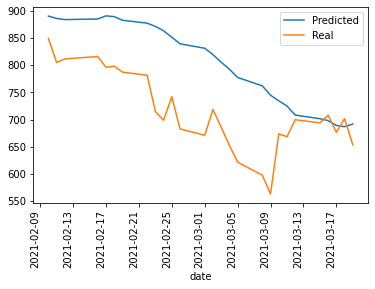

In [19]:
# Plot the real vs predicted values as a line chart
stock.plot(rot=90)